In [3]:
import numpy as np
import matplotlib.pyplot as plt
import torch as t
from scipy.integrate import odeint




BetaiScaled = 5   # Initial rate constant per infected per day
Betai = BetaiScaled/10000

Gammai = 0.45     # Initial recoveries per person per day
kvi = 0         # Initial vaccination rate

Br  = 3000                               # Birthrate (all susceptible)
Muall = 0.32                            # Mortality rate
ts=1




# Specify Initial Steady-State Values
# These are the equations for the "interesting" initial steady-states

Si = (Gammai + Muall)/Betai          #Initial Susceptible Population
Ii = Br/(Gammai+Muall)-(Muall+kvi)/Betai    #Initial Infected/Infectious Population

Ri = Br/Muall - Si - Ii               #Initial Removed Population
Ni = Ri+Ii+Si                        #Total Population

def f(x,t,u):
    S=x[0]
    I=x[1]

    Beta=u[0]
    kv=u[1]
    # the model equations (see Munz et al. 2009)
    f0 = Br - Beta*S*I - Muall*S-kv*S
    f1 = Beta*S*I - Gammai*I - Muall*I
    return [f0, f1]
x0=[Si,Ii]
u0=[Betai,kvi]
Tstop=160
t_space = np.linspace(0,Tstop,Tstop+1)

u=np.zeros([2,Tstop+1])
u[0][0:10]=Betai
u[0][10:]=0.5*Betai
u[1][0:50]=kvi
u[1][50:]=kvi+0.1


S_t = np.empty_like(t_space)
I_t = np.empty_like(t_space)
S_t[0] = x0[0]
I_t[0] = x0[1]


# solve ODE
for i in range(1,Tstop+1):
    # span for next time step
    tspan = [t_space[i-1],t_space[i]]
    # solve for next step
    x = odeint(f,x0,tspan,args=(u[:,i],))
    # store solution for plotting
    S_t[i] = x[1][0]
    I_t[i] = x[1][1]
    # next initial condition
    x0 = x[1]



# solve the DEs
# soln = odeint(f, x0, t,args=u)
# S_t = soln[:, 0]
# I_t = soln[:, 1]
# Beta_t = soln[:, 2]
# kv_t = soln[:, 3]
# gamma_t = soln[:, 4]





In [8]:
I_t.size

161

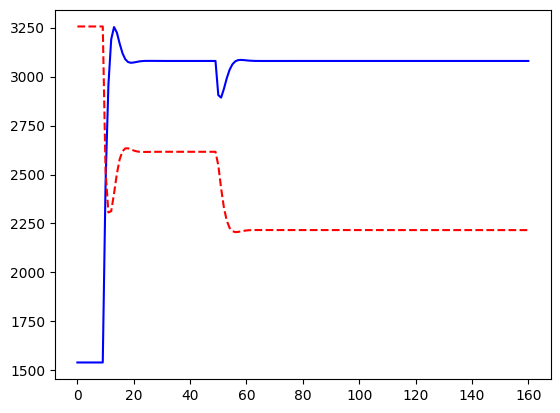

In [9]:

plt.plot(t_space,S_t,'b-',label='x(t)')
plt.plot(t_space,I_t,'r--',label='y(t)')